<a href="https://colab.research.google.com/github/kausthub-kannan/Hackathon/blob/codespace-kausthub-kannan-super-dollop-p5wj9r6976q27w5g/Medical_Charges_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Data



In [69]:
medical_data = pd.read_csv("insurance.csv")
ct=make_column_transformer((MinMaxScaler(), ["age","bmi"]), (OneHotEncoder(handle_unknown="ignore"), ["sex","region","smoker"]))
x=medical_data.drop("charges",axis=1)
y=medical_data["charges"]
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size=0.15, random_state=42)

ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

#Model

In [ ]:
medical_model =  tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
medical_model.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=["mae"])

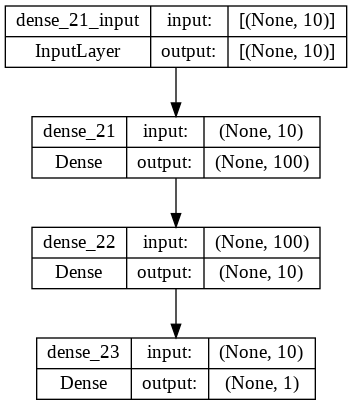

In [80]:
plot_model(medical_model, show_shapes=True)

#Training

In [ ]:
history = medical_model.fit(x_train,y_train,epochs=100)

In [76]:
medical_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 3224.7397 - mae: 3224.7397


[3224.73974609375, 3224.73974609375]

#Loss Curve

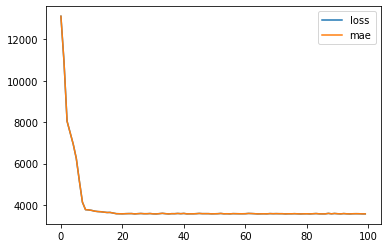

In [77]:
pd.DataFrame(history.history).plot()